# Init

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
df = pd.read_csv('../data/bikes_borrowed.csv')
df.rename(columns={
    't1': 't_real',
    't2': 't_feels_like',
    'cnt': 'count',
}, inplace=True)

df.head()

,count,t_real,t_feels_like,humidity,wind_speed,is_weekend,season
0,182,3.0,2.0,93.0,6.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,3.0


# Count per seasson

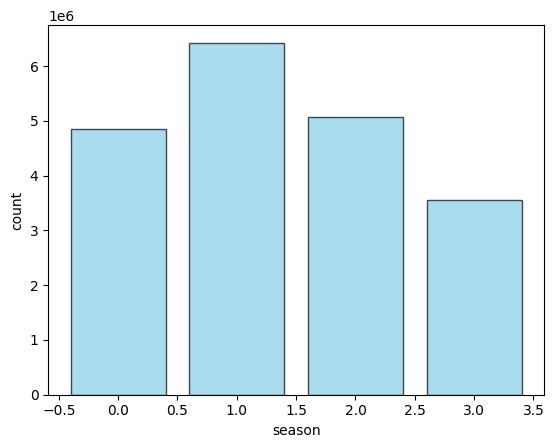

In [3]:
count_per_season = df.groupby('season')['count'].sum()
plt.bar(count_per_season.keys(), count_per_season.values, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('season')
plt.ylabel('count')
plt.show()

# Mean count per temperature

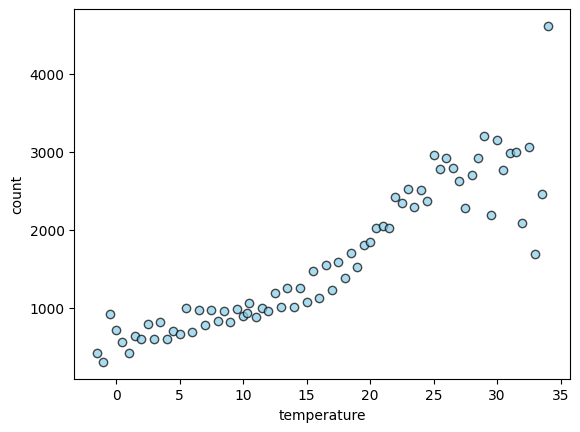

In [5]:
count_per_temperature = df.groupby('t_real')['count'].mean()
plt.scatter(count_per_temperature.keys(), count_per_temperature.values, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('temperature')
plt.ylabel('count')
plt.show()

# Mean count per humidity 

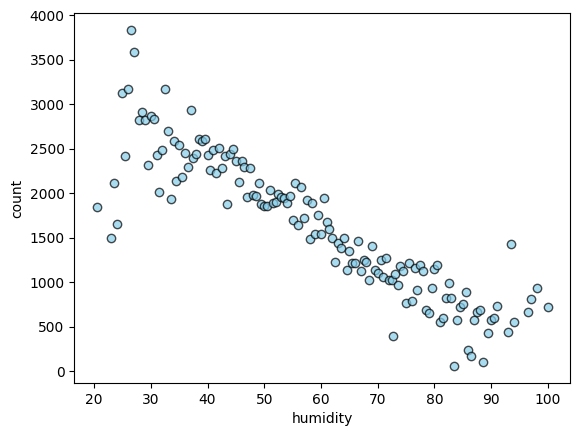

In [6]:
count_per_temperature = df.groupby('humidity')['count'].mean()
plt.scatter(count_per_temperature.keys(), count_per_temperature.values, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('humidity')
plt.ylabel('count')
plt.show()

# Predict temperature feels like

In [61]:
df['t_feels_like_prediction'] = df['t_real'] + (df['humidity'] * df['t_real']) / 1000 - (df['wind_speed'] / 10) - 2

df.head()

,t_real,t_feels_like,humidity,wind_speed,t_feels_like_prediction
10,3.0,-0.5,93.0,12.0,0.079
11,2.0,-1.5,100.0,12.0,-1.000
12,2.0,-1.5,96.5,13.0,-1.107
13,3.0,-0.5,87.0,15.0,-0.239
15,2.0,-1.5,93.0,11.0,-0.914


# Evaluate

In [62]:
mae = np.mean(np.abs(df['t_feels_like'] - df['t_feels_like_prediction']))
print(mae)

2.028340505491597
